In [5]:
# ATMS 305, FALL 2024 - Lab19 : 2024 Eclipse

In [6]:
# >> A. MARKDOWN SOLAR ECLIPSE MAP
#
# 1. Go to this site: https://solarsystem.nasa.gov/eclipses/2024/apr-8-total/where-when/
# 2. Scroll down to the total solar eclipse path map IMAGE - (from NASA).
#      Copy the image URL (it is long).
#
# 3. Create a *text cell* below this one and display that image with Markdown.
#      (do *NOT* wget the image, read in and display with imshow)
#    How to do ... put this in your text cell:
#       ![info regarding image](image URL goes here)
#    Description of images in Python markdown:
#      https://stackoverflow.com/questions/62617348/how-to-insert-image-from-url-in-jupyter-notebook-markdown

![Eclipse](https://science.nasa.gov/wp-content/uploads/2022/10/eclipse-map-2024-1920-1.png?w=2048&format=webp)

In [7]:
# >> B. IMPORT and INSTALL
#
#  Get numpy, matplotlib/pyplot and image,
#  pandas, and cartopy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as img
import cartopy.feature as cfeature
import cartopy.crs as ccrs

In [8]:
# >> C. GET and READ IN ECLIPSE DATA with PANDAS
#
# 1. Use wget to retrieve the CSV (comma-separated-value)
#    file from this url:
#         rfd.atmos.uiuc.edu/305/eclipse2024.csv
#
# 2. Use Pandas to read in the CSV file;
#      put the result in Python variable name "eclipse" .
#
# 3. Finish this cell using the Pandas head() function
#      to see the beginning of the data set.
#
# INFO: Pandas documentation is at this URL:
#      https://pandas.pydata.org/docs/user_guide/index.html

!wget -q -N rfd.atmos.uiuc.edu/305/eclipse2024.csv
eclipse = pd.read_csv('eclipse2024.csv')
eclipse.head()

,GMT,Lat1,Lat2,Lon1,Lon2,Time1,Time2
0,1656,0,15.9,132,13.5,3,10.9
1,1658,0,59.7,130,54.5,3,15.2
2,1700,1,42.7,129,41.2,3,19.3
3,1702,2,24.8,128,32.8,3,23.1
4,1704,3,6.3,127,28.6,3,26.8


In [9]:
# >> D. CREATE LAT, LON and TIME arrays from Pandas data series
#
# 1. Use Lat1, Lat2 (which are in the Pandas data) to create a NEW latitude
#    field called 'Lat' -- in the eclipse Pandas data set.
#   a) This will be the sum of the Lat1 field and the Lat2 field divided by 60.
#      ... Lat1 contains eclipse latitude in whole degrees, and
#          Lat2 contains the latitude 'minutes'.
#   b) INFO: eclipse.Lat= ... will NOT work.  Use eclipse['Lat'] = ...
#      INFO: for syntax on doing math with (and creating new fields in)
#         Pandas, load the Pandas doc page above and search for:
#             Column selection, addition, deletion
#
# 2. Do the same to create a NEW longitude field 'Lon', BUT take the
#    MINUS of the (Lon1 + Lon2/60) fields to make the west longitude *negative*
#
# 3. Add Time1 and Time2/60 to create a Time array:
#       the duration of totality in minutes.
#
# 4. Finish with another Pandas head() listing of the start of the data series
#    to verify your Lat, Lon and Time fields are there.
#    CHECK: data at 1656 UTC: Lat 0.265, Lon -132.225, Time 3.181667
#

eclipse['Lat'] = (eclipse['Lat1'] + eclipse['Lat2'] / 60) 
eclipse['Lon'] = -(eclipse['Lon1'] + eclipse['Lon2'] / 60) 
eclipse['Time'] = (eclipse['Time1'] + eclipse['Time2'] / 60)
eclipse.head()

,GMT,Lat1,Lat2,Lon1,Lon2,Time1,Time2,Lat,Lon,Time
0,1656,0,15.9,132,13.5,3,10.9,0.265000,-132.225000,3.181667
1,1658,0,59.7,130,54.5,3,15.2,0.995000,-130.908333,3.253333
2,1700,1,42.7,129,41.2,3,19.3,1.711667,-129.686667,3.321667
3,1702,2,24.8,128,32.8,3,23.1,2.413333,-128.546667,3.385000
4,1704,3,6.3,127,28.6,3,26.8,3.105000,-127.476667,3.446667


In [10]:
# >> E. JUST THE STATS PLEASE
#
# Use Pandas' describe() function to get stats from
#  the eclipse data series. Like head(), you don't
#  need anything inside the parentheses.
#  The solution to this cell is one statement long!!
#
# NOTE: for more info, search for "statistics" in the
#  above web page.  describe() is mentioned under
#  the topic Descriptive statistics.
eclipse.describe()

,GMT,Lat1,Lat2,Lon1,Lon2,Time1,Time2,Lat,Lon,Time
count,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000,89.000000
mean,1820.853933,26.213483,30.156180,97.741573,31.466292,3.516854,26.511236,26.716086,-98.266011,3.958708
std,84.734820,14.670217,17.633291,21.709617,17.423958,0.605136,14.991114,14.671247,21.733792,0.498987
min,1656.000000,0.000000,1.500000,37.000000,0.800000,2.000000,0.600000,0.265000,-132.225000,2.470000
25%,1740.000000,14.000000,15.400000,85.000000,17.400000,3.000000,16.500000,14.455000,-114.208333,3.660000
50%,1824.000000,27.000000,27.600000,102.000000,31.900000,4.000000,25.300000,27.191667,-102.265000,4.111667
75%,1908.000000,39.000000,46.300000,114.000000,45.800000,4.000000,33.700000,39.543333,-85.981667,4.378333
max,1952.000000,49.000000,59.700000,132.000000,59.200000,4.000000,59.400000,49.110000,-37.261667,4.470000


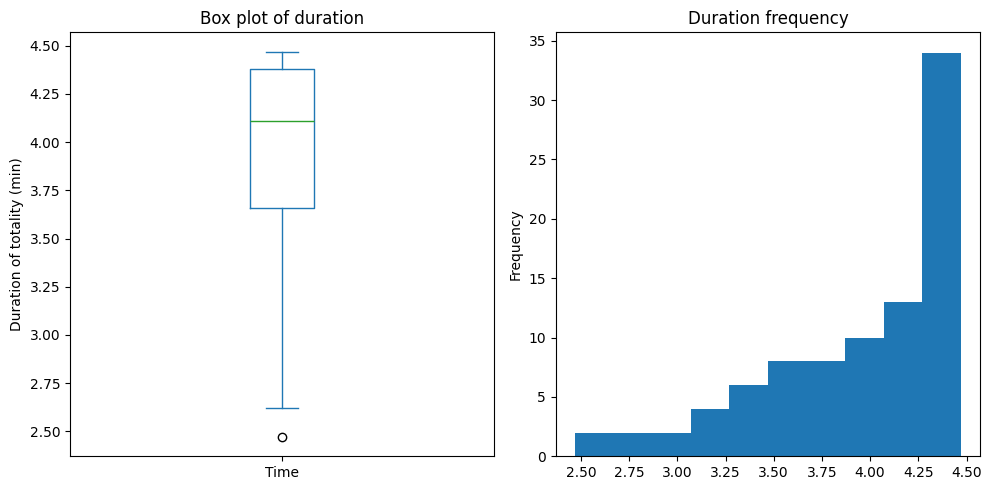

In [11]:
# >> F. TOTALITY DURATION -- BOX PLOT & HISTOGRAM
#
# 1. Set up a 1-row, 2-panel plot; figsize of 10x5 inches
#
# 2. You are about to make plots from 'within' Pandas.
#    INFO: search the above Pandas page for Chart visualization
#      ... also searching for Basic Plotting will give same info.
#
#       So, do NOT do: plt.plot( of anything ... ) but
#        *instead* do: eclipse.NameOfField.plot( )
#       Inside the parentheses at the end of plot() you can specify
#        the plot type (the default is a line plot, so not putting
#       anything inside ( ) is the same as (kind='line').
#
#    >> You can use subplot() here as we have done in the past.
#
# 3. Left plot column:
#     a) use plotting within Pandas to make an eclipse.Time 'box' plot.
#     b) Inside the parentheses, add a Y label with:
#          ylabel="Duration of totality (min)"
#     c) Also in the parentheses, add title: "Box plot of duration"
#
# 4. Second (right) plot column: display an eclipse.Time histogram, with 10 bins.
#      a) Specify 10 bins for the histogram
#      b) Use plt.title() to add title "Duration frequency"
#
# INFO: the Time (totality duration) is mostly 4-4.5 minutes.
#

fig = plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
eclipse.Time.plot(kind='box', ylabel="Duration of totality (min)", title="Box plot of duration")

plt.subplot(1, 2, 2)
eclipse.Time.plot(kind='hist', bins=10, title="Duration frequency")

plt.tight_layout()

In [12]:
# GIVEN: function to COMPUTE DISTANCE between a pair of lat/lon locations
#
# INFO: Python functions start with "def name():", have colon after name
#       and are indented like if-statements and for-loops.
#
# Pass FOUR values to this function - a pair of latitudes, and of longitudes.
#   Be CAREFUL that you pass longitudes as degrees east (so U.S. values are negative).
#   Returned value is distance between the 2 locations, in kilometers.

def getdist(lat1, lon1, lat2, lon2):
    Avg_Lat = 0.5*(lat1+lat2)
    Ydist = 111.*(lat1-lat2)
    Xdist = 111.*np.cos(Avg_Lat*np.pi/180.)*(lon1-lon2)
    Dist = np.sqrt(Xdist**2 + Ydist**2)
    return Dist

In [28]:
# >> G. TOTALITY at INDIANAPOLIS (IND)
#
# 1. Do a web search to find the lat/lon at Indianapolis (longitude Negative).
#    Set ind_lat and ind_lon to the latitude and longitude values.
# 2. Set variable minDist to 999999
#
# 3. LOOP over all eclipse values and use getdist() above
#      e.g.: for n in range(eclipse.Lat.size):
#       Here we do this to find the smallest distance between
#       each of the eclipse time/locations to Indianapolis
#      a) Inside the loop, use getdist() as we have before, to get
#         the distance from ind_lat,ind_lon to the eclipe points i.e.
#           eclipse.Lat[n], eclipse.Lon[n]
#      b) Still in loop: IF 'd' is smaller than minDist, set:
#           i) minDist equal to d
#          ii) duration = eclipse.Time[n];
#
# 4. When the loop is done, you will have found the minimum distance to IND,
#      i.e. just how close totality was to the IND airport, AND also the
#      duration of totality at that point.
#    > Print both the minimum distance and the duration, to appear like this:
#        Closest approach to IND = XX.XXXX km, with duration Y.YY minutes
#    ... replacing XX.XXXX with the closest distance variable value,
#        and Y.YY with the duration of totality you found at that time.
# INFO: I found it totality to be close to 4 minutes at Indy.
#

ind_lat = 39.791
ind_lon = -86.148
minDist = 999999
duration = 0

for n in range(eclipse.Lat.size):
    d = getdist(ind_lat, ind_lon, eclipse.Lat[n], eclipse.Lon[n])
    if d < minDist:
        minDist = d
        duration = eclipse.Time[n]

print(f'Closest approach to IND = {minDist:.4f} km, with duration {duration:.2f} minutes')

Closest approach to IND = 30.9474 km, with duration 4.03 minutes


Text(0.5, 1.0, 'April 8, 2024 eclipse')

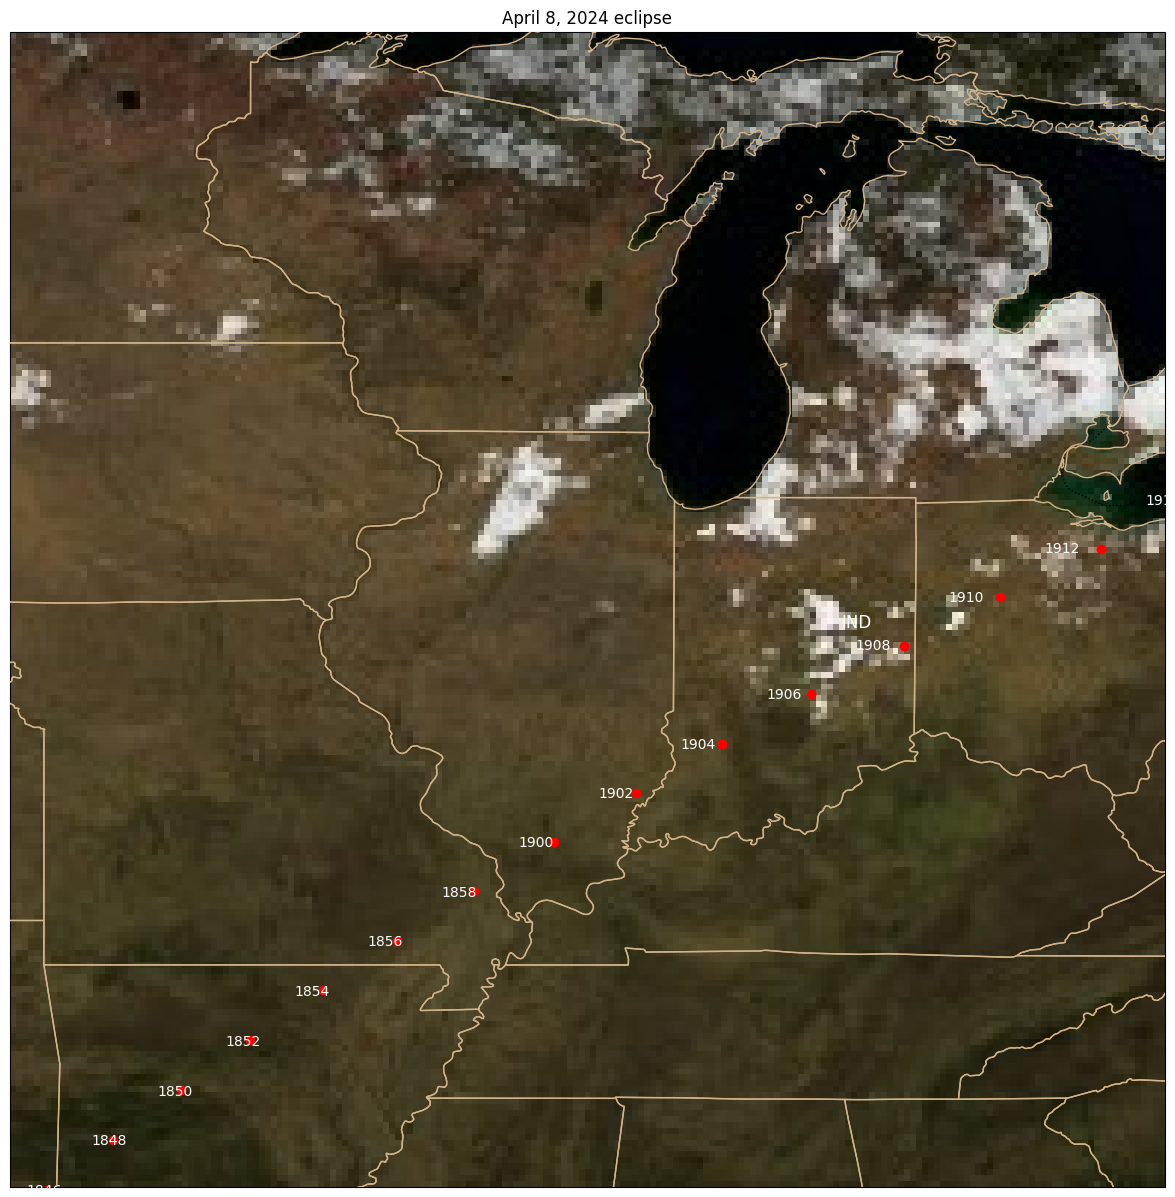

In [27]:
# >> H. ECLIPSE TOTALITY MAP, or, TIME FOR CARTOPY
#
# Here you swipe code from e.g. your Earthquakes assignment, and change it!
# 0: Get and read in a global topo Blue Marble image.
# 1. Set up a new figure.  I used figsize of 15x15", but you can choose otherwise.
# 2. Set up a PlateCarree() projection
# 3. Add states_provinces with scale='10m'. In the actual add_feature for states
#      and provinces, I used these options: edgecolor='tan', zorder=10
# 4. Display the blue_marble image downloaded earlier.  Don't forget transform=
#      and also the (global) extent= of the Blue Marble image.
# 5. Do a scatter plot of the eclipse Lon and eclipse Lat, with color 'red'.
#      Do not, I say, do Not forget transform=
# 6. Still in the world of Cartopy, add a for-loop over all eclipse times.
#      In this loop, add text at each eclipse Lon[] and Lat[], with the text
#      being the eclipse GMT[], with white text (that's: c='white'), and use
#      options transform=... and also clip_on=True inside the text() statement.
# 7. Finally, outside that for-loop, add text again but this time put text 'IND'
#      at the Indianapolis longitude and latitude, fontsize=12, white color again,
#      again with transform= and again with clip_on=True.
# 8. Use the set_extent function with these values: -95, -82, 34, 47
# 9. Finish up by adding this title: April 8, 2024 eclipse

!wget -q -N https://eoimages.gsfc.nasa.gov/images/imagerecords/73000/73909/world.topo.bathy.200412.3x5400x2700.jpg

fig = plt.figure(figsize=(15, 15))
ax = plt.axes(projection=ccrs.PlateCarree())

world = plt.imread("world.topo.bathy.200412.3x5400x2700.jpg")
ax.imshow(world, origin='upper', transform=ccrs.PlateCarree(), extent=[-180, 180, -90, 90])

states_provinces = cfeature.STATES.with_scale('10m')
ax.add_feature(states_provinces, edgecolor='tan', zorder=10)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_global()
ax.scatter(eclipse['Lon'], eclipse['Lat'], color='red', transform=ccrs.PlateCarree())

for n in range(eclipse.Lat.size):
    ax.text(eclipse.Lon[n] + 0.5, eclipse.Lat[n] + 0.5, eclipse.GMT[n], c='white', transform=ccrs.PlateCarree(), clip_on=True)

ax.text(ind_lon + 0.5, ind_lat + 0.5, 'IND', c='white', fontsize=12, transform=ccrs.PlateCarree(), clip_on=True)
ax.set_extent([-95, -82, 34, 47], crs=ccrs.PlateCarree())
ax.set_title('April 8, 2024 eclipse')

In [ ]:
# USE THIS cell to SAVE NOTEBOOK as HTML
# %%shell
# jupyter nbconvert --to html  NAME